In [46]:
!jupyter nbextension enable vega --py --sys-prefix

Enabling notebook extension jupyter-vega/index...
      - Validating: OK


# Better not Bigger: Thoughts on Foundation Data Science in Biology

John McCallum  john.mccallum@plantandfood.co.nz 

https://github.com/cfljam/TidyWGSWorkshop

| |  |
|---|---|
| ![](http://www.aquaculture.org.nz/wp-content/uploads/2011/06/plant-and-food-logo.jpg)  |   |

![](https://photos.smugmug.com/Philippines/Mountain-Province-Philippines/i-PLkk2V5/0/2e640df2/O/P1070080rw%20web.jpg)

# Scale

<img align='right' src=./images/MOUNTDATA.png width="300" height="800" >

- Genomes 10<sup>8</sup> - 10<sup>10</sup>
- Variant files 10<sup>8</sup>-10<sup>9</sup> byte per Chromosome
- Could just fit these into desktop disk and memory


# Mission

- process, join, filter
- visualise
- report
- share

| ![](https://avatars2.githubusercontent.com/u/6392739?v=3&s=400)  | ![](http://surf8.blue/wordpress/wp-content/uploads/2015/02/ggplot2-official-hexbin-logo.png)  |
|---|---|
| ![](https://www.iconexperience.com/_img/o_collection_png/green_dark_grey/256x256/plain/table.png)  |  ![](https://avatars3.githubusercontent.com/u/7388996?v=3&s=200) |

# This presentation is a Jupyter Notebook...just a JSON file

In [1]:
! head ./BetterBiggerDataSciConf_LincolnMay2017.ipynb

{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {
    "slideshow": {
     "slide_type": "slide"
    }
   },
   "source": [


- stored in a [Github repo](https://github.com/cfljam/TidyWGSWorkshop/blob/master/Presentations/BetterBiggerDataSciConf_LincolnMay2017.ipynb)
- rendered as html ([Rendered version ](BetterBiggerDataSciConf_LincolnMay2017.html))

In [4]:
!jupyter nbconvert BetterBiggerDataSciConf_LincolnMay2017.ipynb

[NbConvertApp] Converting notebook BetterBiggerDataSciConf_LincolnMay2017.ipynb to html
[NbConvertApp] Writing 255305 bytes to BetterBiggerDataSciConf_LincolnMay2017.html


# Jupyter lets me use Kernels for Multiple Languages

in my case Python 2&3 , bash, R

In [43]:
!jupyter kernelspec list

Available kernels:
  pyr              /Users/johnmccallum/Library/Jupyter/kernels/PyR
  bash             /Users/johnmccallum/Library/Jupyter/kernels/bash
  python3          /Users/johnmccallum/Library/Jupyter/kernels/python3
  ir               /Users/johnmccallum/anaconda3/envs/TidyWGS/share/jupyter/kernels/ir
  python2          /usr/local/share/jupyter/kernels/python2
  tidywgs_py3.5    /usr/local/share/jupyter/kernels/tidywgs_py3.5


# Talking Shell: Inspect our Conda Configuration

In [9]:
%%bash
conda info -e
conda list | head -n8
which R

# conda environments:
#
MyR                      /Users/johnmccallum/anaconda3/envs/MyR
TidyWGS               *  /Users/johnmccallum/anaconda3/envs/TidyWGS
root                     /Users/johnmccallum/anaconda3

# packages in environment at /Users/johnmccallum/anaconda3/envs/TidyWGS:
#
appdirs                   1.4.3                     <pip>
appnope                   0.1.0                    py35_0  
blas                      1.1                    openblas    conda-forge
bleach                    1.4.2                    py35_0    bioconda
bleach                    2.0.0                     <pip>
bokeh                     0.12.5                   py35_2    conda-forge
/Users/johnmccallum/anaconda3/envs/TidyWGS/bin/R


# (Re)-creating the Environment for this Talk/Notebook/Demo


```
conda env create -f  TidyWGSDemo.environment.osx.yml
```

# Modern Table Idioms in R & Python

<img align='right' src='https://www.patspicks.com/images/uploads/jpmorgan_loss.jpg' >

- key to 'going large'
- familiar 'spreadsheet-like' data structure
- expressive vocabulary for data cleaning and aggregation
- all support 'pipeline' functionality
- widely different syntax 
- very SQL-like
- differing scalability
- extensions allow same syntax for out-of-memory ('big') data


| ![](https://d21ii91i3y6o6h.cloudfront.net/gallery_images/from_proof/9295/small/1447175226/rstudio-hex-dplyr-dot-psd.png) | ![](https://d21ii91i3y6o6h.cloudfront.net/gallery_images/from_proof/9290/large/1447092142/tidyr-hexbin-sticker-from-rstudio.png)  |![](http://www.pragso.com/content/images/2016/07/pandas_logo-3.png)   |
|---|---|---|


<img align='right' src='http://pandas.pydata.org/_static/pydata_cover.jpg' width="200" height="300" >
<img align='left' src='http://r4ds.had.co.nz/cover.png' width="200" height="300" >
<img align='center' src='https://assets.datacamp.com/production/course_616/shields/original/data.table_r.png?1477576415' width="200" height="300" >




In [6]:
import pandas as pd
from bokeh.charts import Scatter,Histogram, output_notebook, show
output_notebook()

Loading BokehJS ...

In [7]:
PIdf=pd.read_table('../CK_13_CHR1.Pi.gz',compression='gzip')
PIdf.head()

,CHROM,BIN_START,BIN_END,N_VARIANTS,PI
0,CHR1,1,10000,156,0.004791
1,CHR1,10001,20000,253,0.008446
2,CHR1,20001,30000,413,0.013647
3,CHR1,30001,40000,164,0.004879
4,CHR1,40001,50000,279,0.008922


In [37]:
h1=Histogram(PIdf,'PI',title='CHR1 Pi',height=200)
show(h1)

In [13]:
tooltips=[
    ('N Variants','@N_VARIANTS'),
    ('Bin Start', '@BIN_START')
]
s1=Scatter(PIdf,'BIN_START','PI',
          title="Tajimas Pi, CHR1 ",tooltips=tooltips,height=300)
show(s1)

In [15]:
%load_ext rpy2.ipython

# R data.table

<img align='right' src='https://d21ii91i3y6o6h.cloudfront.net/gallery_images/from_proof/16249/large/1481352925/number-rdatatable.png' width="200" height="200" >

- currently fastest in-memory table solution
- https://github.com/Rdatatable/data.table/wiki
- fast, clever reader **fread** guesses most formats **and** can read from stdin


In [20]:
%%R
library(data.table, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(ggplot2, quietly = TRUE)

DT <- fread('gzip -dc ../CK_13_CHR1.Pi.gz')
head(DT)

   CHROM BIN_START BIN_END N_VARIANTS         PI
1:  CHR1         1   10000        156 0.00479077
2:  CHR1     10001   20000        253 0.00844585
3:  CHR1     20001   30000        413 0.01364710
4:  CHR1     30001   40000        164 0.00487877
5:  CHR1     40001   50000        279 0.00892246
6:  CHR1     50001   60000        158 0.00525415


In [59]:
%%R
pi_list <- list.files('../PI',,full.names = TRUE)
DTPi <- rbindlist(lapply(pi_list,
                         function (X) fread(paste0('gzip -dc ',X))))
    dim(DTPi)

[1] 54017     5


In [60]:
%%R
DTPi[,list(N=sum(N_VARIANTS)),by=CHROM][1:10]

    CHROM      N
 1:  CHR1 652994
 2: CHR10 612803
 3: CHR11 512611
 4: CHR12 641216
 5: CHR13 601139
 6: CHR14 591290
 7: CHR15 564975
 8: CHR16 667639
 9: CHR17 596330
10: CHR18 660321


In [36]:
%%R 
DTPi %>% group_by(CHROM)  %>% summarise(sum(N_VARIANTS))

# A tibble: 29 × 2
   CHROM `sum(N_VARIANTS)`
   <chr>             <int>
1   CHR1            652994
2  CHR10            612803
3  CHR11            512611
4  CHR12            641216
5  CHR13            601139
6  CHR14            591290
7  CHR15            564975
8  CHR16            667639
9  CHR17            596330
10 CHR18            660321
# ... with 19 more rows


# Declarative Graphics with ggplot2

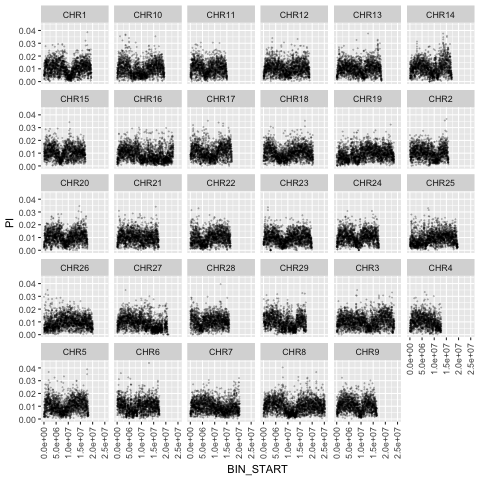

In [58]:
%%R
DTPi %>%
    ggplot(aes(x=BIN_START,y=PI)) +
    geom_point(size=0.2,alpha=0.2) +
    facet_wrap(~ CHROM) +
    theme(axis.text.x  = element_text(angle=90, vjust=0.5))

# Declarative Graphics with Altair

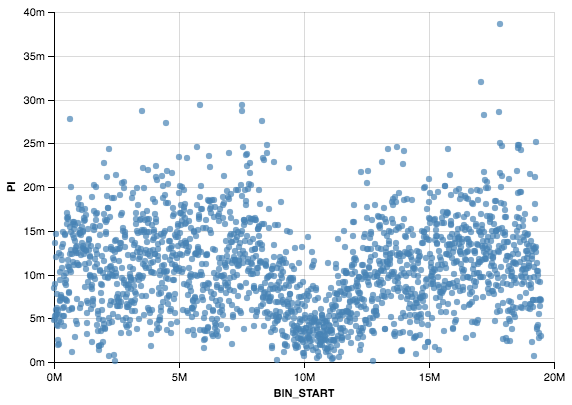

In [54]:
from altair import *
Chart(PIdf).mark_circle().encode(
    x='BIN_START',
    y='PI'
)